# Exploring the Influence of Social Life on Academics


### Silvia Camara, Brenna Leahy, Maria Gund


Our project will be based on a dataset from Kaggle that explores the effect of socioeconomic factors on students grades from a survey of students’ math and portuguese language courses in secondary school. The dataset contains data gathered from Portuguese students who were surveyed on several different aspects of their life, including familial and social relations as well as their academic habits and socio-economic status.We plan to use the data set to predict a student's final grade in a class based on different social factors, including the amount of time he or she spends going out with friends, the quality of their family relationships, whether they take part in after-school activities, as well as the size of their family. Using several features, we want to see if there is a correlation between a student's social life and their grades. We also want to see if there is one specific feature (or a combination of features) that better predicts whether a student's grade will be above average, average, or below average. 

We plan to explore this topic by using principal component analysis to determine which parts of the data are most useful as well as Naive Bayes to present the data comprehensively and analyze it.


In [64]:
# Allow inline plotting of figures.
%matplotlib inline

# Import useful libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.preprocessing import Imputer
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

# Read the file into a DataFrame.
math_data = pd.read_csv("student-mat.csv")
port_data = pd.read_csv("student-por.csv")
#data = data.fillna(0)
#data = data.dropna()

In [65]:
# We need to fix what numbers go in the arrays to match our number of features and class

X_math = math_data.iloc[:, :-1]  # features
Y_math = math_data.iloc[:, -1]  # class

X_port = port_data.iloc[:, :2]  # features
Y_port = port_data.iloc[:, -1]  # class

print(X_math.head())
print()
print(Y_math.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other ...   
3     GP   F   15       U     GT3       T     4     2   health  services ...   
4     GP   F   16       U     GT3       T     3     3    other     other ...   

  romantic famrel  freetime  goout  Dalc Walc health absences  G1  G2  
0       no      4         3      4     1    1      3        6   5   6  
1       no      5         3      3     1    1      3        4   5   5  
2       no      4         3      2     2    3      3       10   7   8  
3      yes      3         2      2     1    1      5        2  15  14  
4       no      4         3      2     1    2      5        4   6  10  

[5 rows x 32 columns]

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64


## Math Data Set

In [97]:
# Output the first few rows of the math dataset.
math_data.head()
print(math_data)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
5       GP   M   16       U     LE3       T     4     3  services     other   
6       GP   M   16       U     LE3       T     2     2     other     other   
7       GP   F   17       U     GT3       A     4     4     other   teacher   
8       GP   M   15       U     LE3       A     3     2  services     other   
9       GP   M   15       U     GT3       T     3     4     other     other   
10      GP   F   15       U     GT3       T     4     4   teacher    health   
11      GP   F   15       U     GT3       T     2   

## Portuguese Data Set

In [99]:
# Output the first few rows of the portuguese dataset.
port_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Maria, you said something about binning the data?

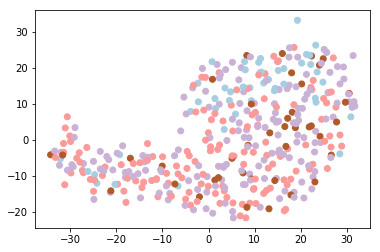

In [126]:
from sklearn.manifold import TSNE

bins = pd.cut(Y_math, 4, labels=False) #bin the final grade data into 3 bins

model = TSNE()
Y = model.fit_transform(pd.get_dummies(math_data.iloc[:, :-3]))

plt.scatter(Y[:, 0], Y[:, -1], c=bins, cmap=plt.cm.Paired)
plt.show()

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc      ...       activities_no  activities_yes  nursery_no  nursery_yes  \
0     1      ...                   1               0           0            1   
1     1      ...                   1               0           1            0   
2     2      ...                   1               0           0            1   
3     1      ...                   0               1           0            1   
4     1      ...                   1               0           0            1   

   higher_no  higher_yes  intern

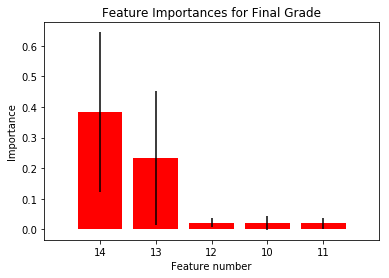

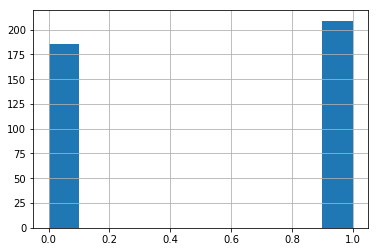

In [171]:
#FEATURE IMPORTANCE
h = .02  # step size in the mesh
bins = pd.cut(Y_math, 2, labels=False) #bin the final grade data into 2 bins


X_math = math_data.iloc[:, :-1]  # features
X_math = pd.get_dummies(X_math)
#X_math = X_math.iloc[:, :-1] #create classifier using age and study time
print(X_math.head())

math_rfc = RandomForestClassifier()
math_rfc.fit(X_math, bins)

importances = math_rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in math_rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
indices = indices[:5]
headers = X_math.dtypes.index

print("Feature ranking:")

for f in range(5):
    print("%d. %s (feature %d): %f" % (f + 1, headers[indices[f]], indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature Importances for Final Grade")
plt.bar(range(5), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(5), indices)
plt.xlim([-1, 5])
plt.xlabel("Feature number")
plt.ylabel("Importance")
plt.show()

#END OF FEATURE IMPORTANCE

bins.hist()

# Precision Scores

age + age precision: 0.653
age + Medu precision: 0.646
age + Fedu precision: 0.672
age + traveltime precision: 0.629
age + studytime precision: 0.623
age + failures precision: 0.725
age + freetime precision: 0.612
age + goout precision: 0.701
age + Dalc precision: 0.667
age + Walc precision: 0.676
Medu + age precision: 0.642
Medu + Medu precision: 0.714
Medu + Fedu precision: 0.661
Medu + traveltime precision: 0.680
Medu + studytime precision: 0.619
Medu + failures precision: 0.646
Medu + famrel precision: 0.609
Medu + freetime precision: 0.662
Medu + goout precision: 0.621
Medu + Dalc precision: 0.629
Medu + Walc precision: 0.630
Medu + health precision: 0.679


/Users/mariagund/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/mariagund/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Medu + absences precision: 0.673


/Users/mariagund/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/mariagund/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Fedu + age precision: 0.692
Fedu + Medu precision: 0.634


/Users/mariagund/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/mariagund/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Fedu + Fedu precision: 0.639
Fedu + studytime precision: 0.641


/Users/mariagund/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/mariagund/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Fedu + failures precision: 0.667
Fedu + famrel precision: 0.636


/Users/mariagund/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/mariagund/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Fedu + freetime precision: 0.655
Fedu + goout precision: 0.698
Fedu + Dalc precision: 0.621


/Users/mariagund/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/mariagund/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyboardInterrupt: 

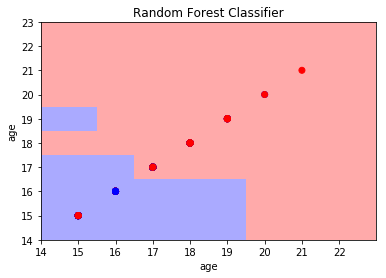

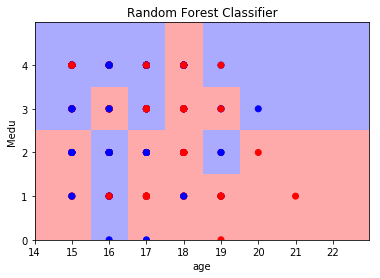

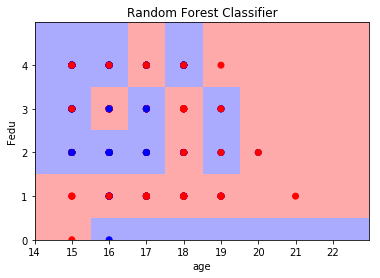

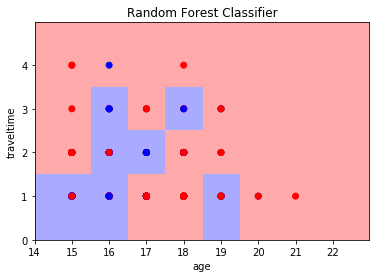

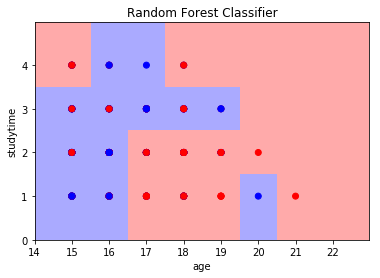

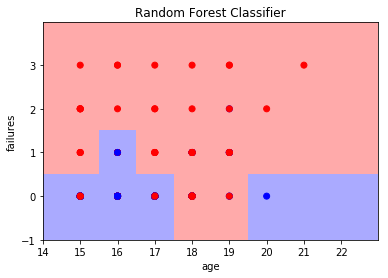

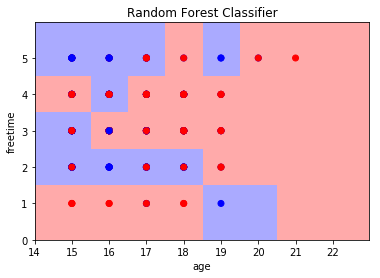

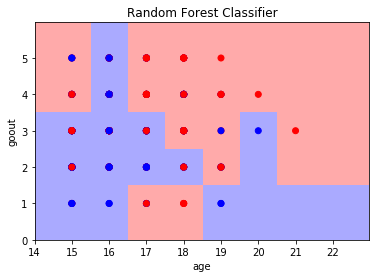

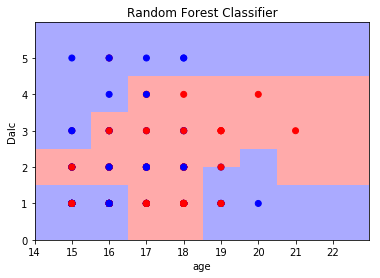

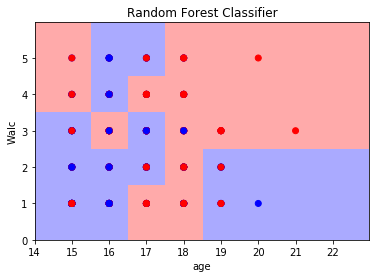

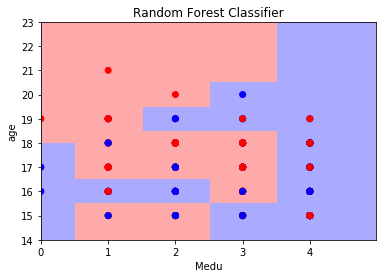

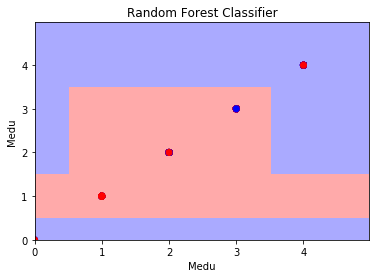

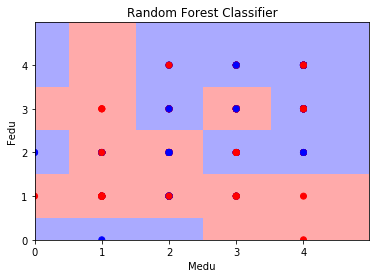

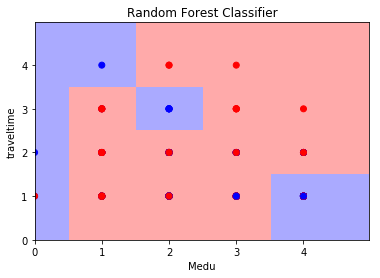

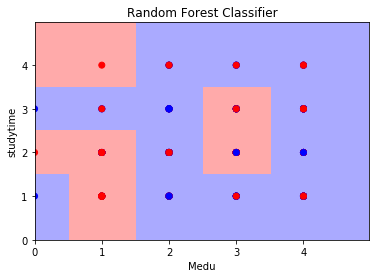

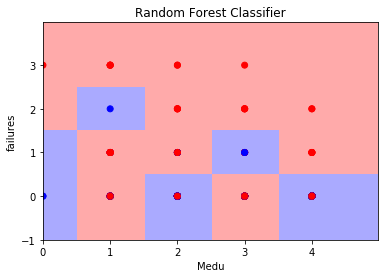

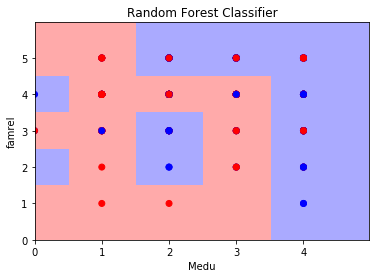

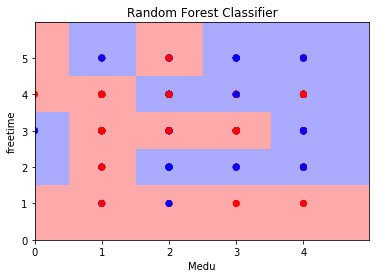

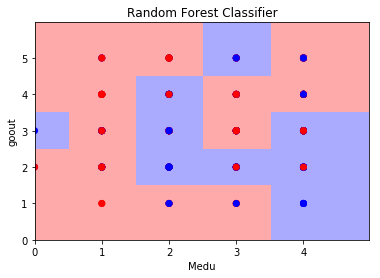

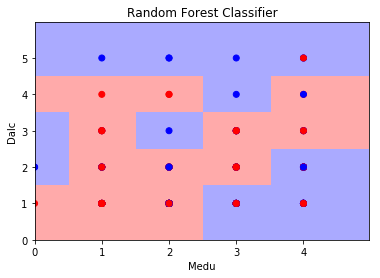

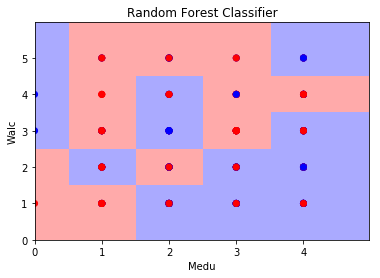

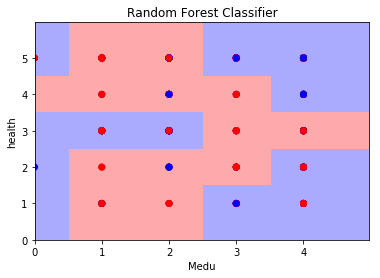

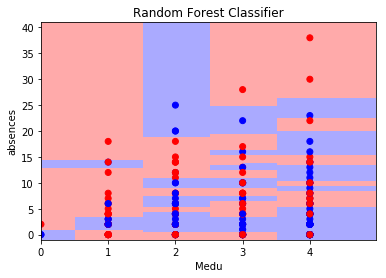

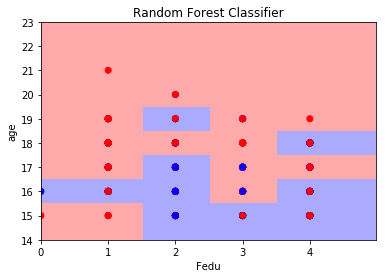

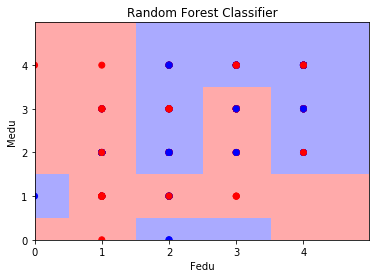

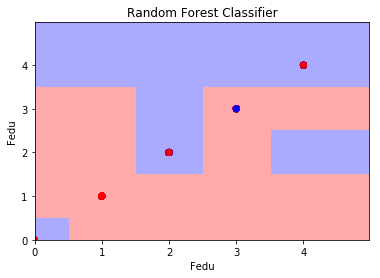

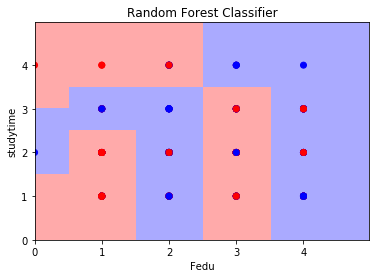

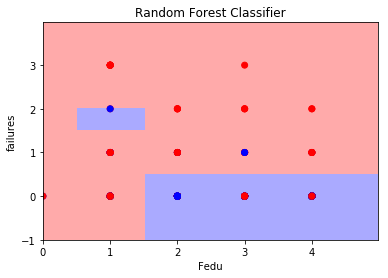

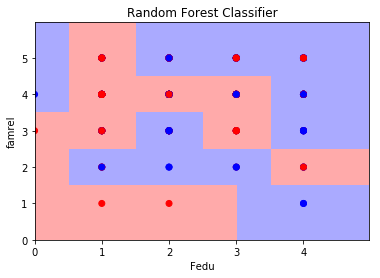

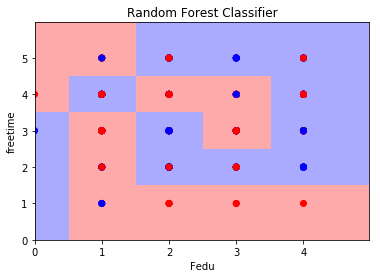

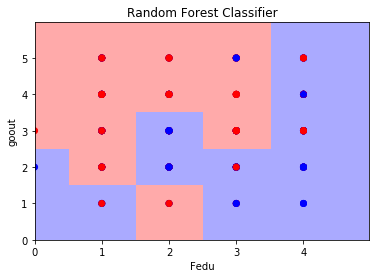

In [168]:
from sklearn.metrics import precision_score
h = .02  # step size in the mesh
bins = pd.cut(Y_math, 2, labels=False) #bin the final grade data into 2 bins


X_math = math_data  # features
Y_math = math_data.iloc[:, -1]  # class
X_math = pd.get_dummies(X_math)
#X_math = X_math.iloc[:, [0,4]] #create classifier using age and study time
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

#split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(X_math, bins, test_size=0.3)

total = 0
count = 0

for i in range(13):
    #X_math = X_math.iloc[:, [i,15]] #create classifier using age and study time
    for j in range(13):
        x_train2 = x_train.iloc[:,[i,j]]
        x_test2 = x_test.iloc[:,[i,j]]
        #print(x_train.head())

        math_rfc = RandomForestClassifier()
        math_rfc.fit(x_train2, y_train)
        
        y_predictDTC = math_rfc.predict(x_test2)

        #find accuracy of classifiers
        acc = precision_score(y_test, y_predictDTC)
        total += acc
        count += 1
        '''
        if (acc > 0.6):
            print("{} + {} precision: {:.3f}".format(headers[i], headers[j], acc))
            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, m_max]x[y_min, y_max].
            x_min, x_max = x_test2.iloc[:, 0].min() - 1, x_test2.iloc[:, 0].max() + 1
            y_min, y_max = x_test2.iloc[:, 1].min() - 1, x_test2.iloc[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                                 np.arange(y_min, y_max, h))
            Z = math_rfc.predict(np.c_[xx.ravel(), yy.ravel()])

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            plt.figure()
            plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

            # Plot also the training points
            plt.scatter(x_train2.iloc[:, 0], x_train2.iloc[:, 1], c=y_train, cmap=cmap_bold)
            plt.xlim(xx.min(), xx.max())
            plt.ylim(yy.min(), yy.max())
            plt.title("Random Forest Classifier")
            plt.xlabel(headers[i])
            plt.ylabel(headers[j])
        '''
            
print("average precision: {}".format(total/count))

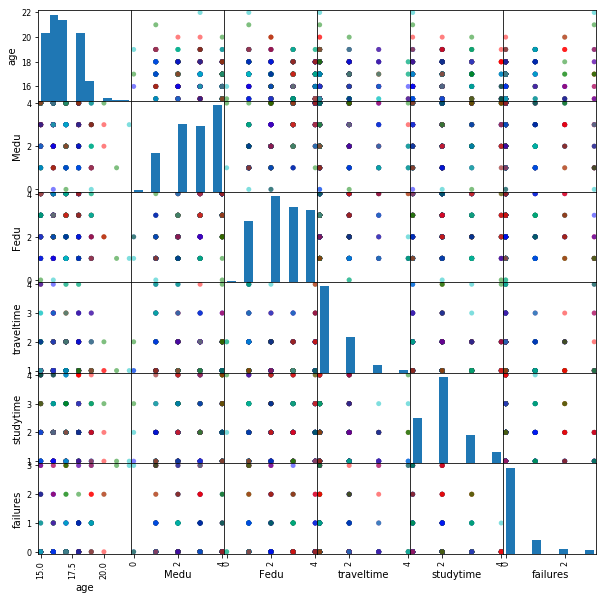

In [89]:
my_colors = ['g', 'b', 'r', 'c']
pl1 = pd.plotting.scatter_matrix(math_data.iloc[:, :15], figsize=(10,10), color=my_colors, s=100)